<a href="https://colab.research.google.com/github/Gyuhyeon-Eom/python/blob/main/week14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

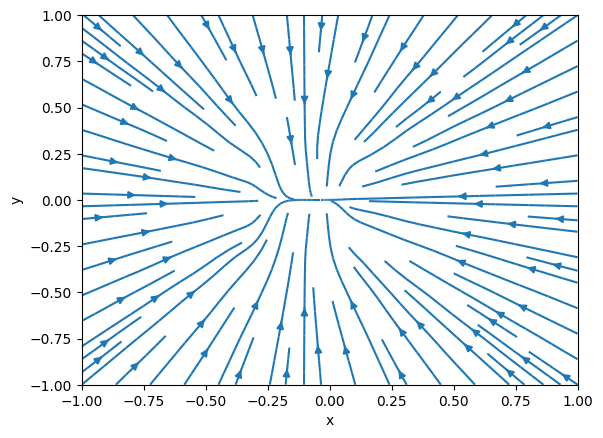

In [15]:
#전기퍼텐셜
#위의 코드를 수정해서 두 점전하 q1 = 1, q2 = -1가 각각 (-0.1,0), (0.1,0)에 놓여 있을 때의 전기장을
#그래프로 그려보시오. 저옵가 좀 더 명확히 드러나는 그래프를 그리려 노력해보시오. x축, y축을 따라서 전기장의 크기
#|E|를 그래프로 각각 그리고 원점으로 부터 거리 r에 대해 어떤 꼴로 크기가 줄어드는지 알아보시오

import numpy as np
import matplotlib.pyplot as plt

q = -1
#q2 = 1

def E(q, r0, x, y):
  X = x-r0[0]
  Y = y-r0[1]
  denom = (np.sqrt( X**2 + Y**2))**3
  return q*X/denom, q*Y/denom

r0 = np.array([-0.1, 0.0])
#r1 = np.array([0.1, 0.0])
Nx, Ny = 10, 10 # x,y축의 눈금 갯수
x = np.linspace(-1, 1, Nx)
y = np.linspace(-1, 1, Ny)
X, Y = np.meshgrid(x, y)
Ex, Ey = E(q, r0, X, Y)
#Ex1, Ey1 = E(q2, r1, X, Y)
plt.streamplot(X, Y, Ex, Ey)
#plt.streamplot(X,Y,Ex1,Ey1)
plt.xlabel('x')
plt.ylabel('y')
plt.show()


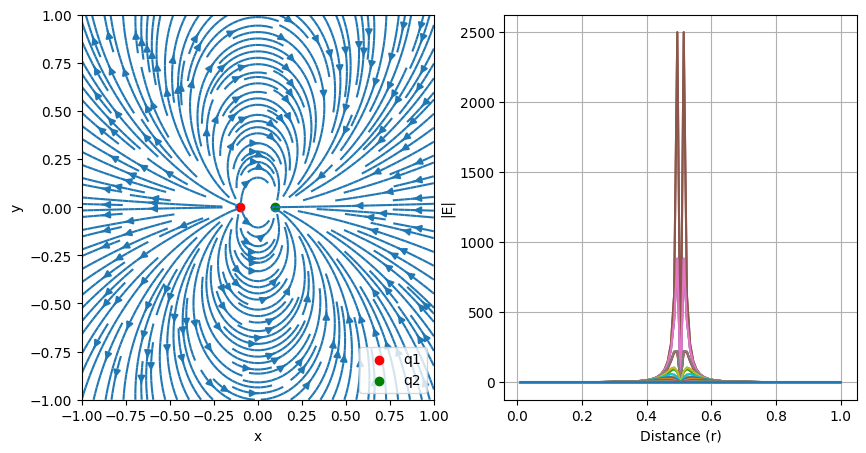

In [40]:
import numpy as np
import matplotlib.pyplot as plt

q1 = 1
q2 = -1

def E(q, r, x, y):
    X = x - r[0]
    Y = y - r[1]
    denom = (np.sqrt(X**2 + Y**2))**3
    return q * X / denom, q * Y / denom

r1 = np.array([-0.1, 0.0])
r2 = np.array([0.1, 0.0])
Nx, Ny = 101, 101  # x, y 축의 눈금 갯수 증가시킴
x = np.linspace(-1, 1, Nx)
y = np.linspace(-1, 1, Ny)
X, Y = np.meshgrid(x, y)
Ex, Ey = E(q1, r1, X, Y)
Ex2, Ey2 = E(q2, r2, X, Y)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.streamplot(X, Y, Ex+Ex2, Ey+Ey2, density=2)
plt.scatter(r1[0], r1[1], color='red', label='q1')
plt.scatter(r2[0], r2[1], color='green', label='q2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.subplot(1, 2, 2)
r_values = np.linspace(0.01, 1, 101)
plt.plot(r_values, np.abs(Ey+Ey2))
plt.xlabel('Distance (r)')
plt.ylabel('|E|')
plt.grid()
plt.show()


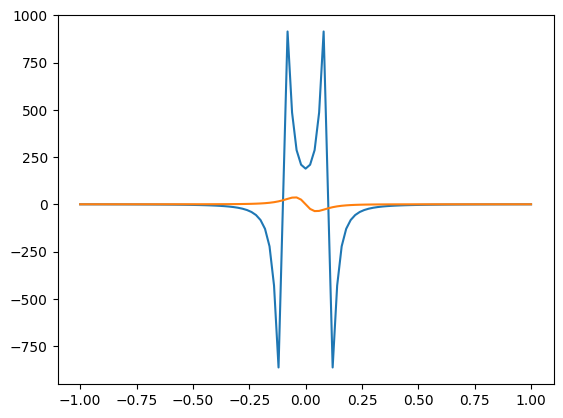

In [43]:
Ex_sum = Ex + Ex2
Ey_sum = Ey + Ey2

plt.plot(x,Ex_sum[Ny//2+1,:])
plt.plot(y,Ey_sum[:,Nx//2+1])

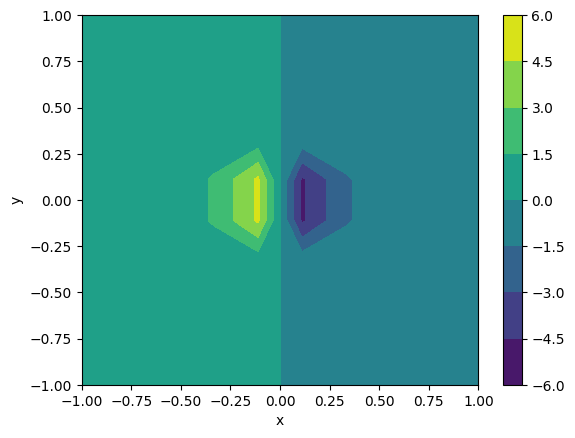

In [65]:
#과제1과 같은 조건에서 전기퍼텐셜을 그래프로 그리시오,
#x축, y축을 따라서 전기 퍼텐셜 세타를 그래프로 각각 그리고
#원점으로부터의 거리 r에 대해 어떤 꼴로 크기가 줄어드는 지 알아보시오
#
import numpy as np
import matplotlib.pyplot as plt

q = 1
q2 = -1

def potential(q, r0, x, y):
  X = x-r0[0]
  Y = y-r0[1]
  denom = (np.sqrt( X**2 + Y**2))
  return q/denom

r0 = np.array([-0.1, 0.0])
r1 = np.array([0.1, 0.0])
Nx, Ny = 10, 10 # x,y축의 눈금 갯수
x = np.linspace(-1, 1, Nx)
y = np.linspace(-1, 1, Ny)
X, Y = np.meshgrid(x, y)
Phi = potential(q, r0, X, Y)
Phi2 = potential(q2, r1, X, Y)
plt.contourf(X,Y,Phi+Phi2)
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()



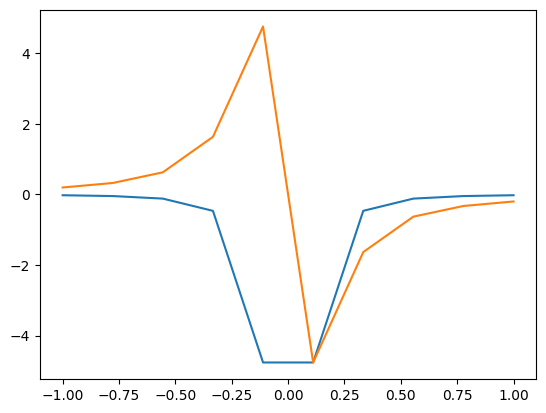

In [63]:
Phi_sum = Phi+Phi2
plt.plot(x,Phi_sum[:,Ny//2])
plt.plot(y,Phi_sum[Nx//2,:])


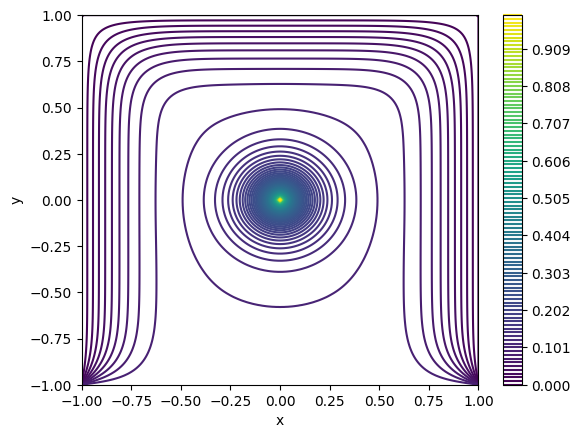

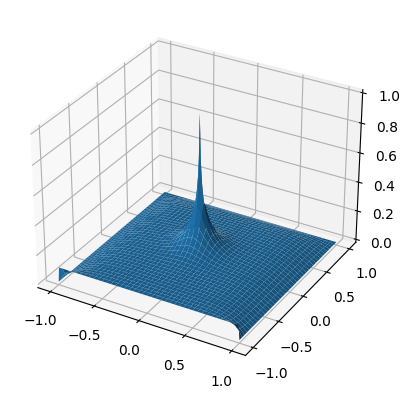

In [73]:
# 풀림 방법
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

h = 0.01
MAX = 1000
Error = 1.0E-8

x = np.arange(-1, 1+0.5*h, h)
y = np.arange(-1, 1+0.5*h, h)

X, Y = np.meshgrid(x, y)
Nx, Ny = np.size(x), np.size(y)

phi = np.ones((Nx,Ny)); phi *= 0.1
phi[0,:] = phi[-1,:] = phi[:,-1] = 0.0
phi[Nx//2,Ny//2] = 1.0

for i in range(MAX):
  phi0 = phi.copy()

  for nx in range(1,Nx-1):

    for ny in range(1,Ny-1):
      phi[nx,ny] = (phi0[nx-1,ny]+phi0[nx+1,ny]+phi0[nx,ny-1]+phi0[nx,ny+1])/4.0

  phi[Nx//2,Ny//2] = 1.0

  if np.max(np.abs(phi-phi0)) < Error: break

plt.contour(X,Y,phi.T, levels = np.linspace(np.min(phi), np.max(phi),100))
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar()
plt.show()
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(X,Y,phi.T)
plt.show()
